# Julia

As languages go, [installing Julia](http://julialang.org/downloads/platform.html) is a piece of cake. You also need [IJulia](https://github.com/JuliaLang/IJulia.jl) to run this notebook. You will also need to instal the PyPlot package:

    Pkg.add("PyPlot")

I'm using Julia v0.4.5. 

## Basic example

[Basic array help.](http://docs.julialang.org/en/release-0.4/manual/arrays/)

[The linalg help is here.](http://docs.julialang.org/en/release-0.4/stdlib/linalg/)

In [1]:
A = [[2,5,4] [1,5,2] [7,9,3]]
b = [1, 0.6, 4]

x = A \ b

3-element Array{Float64,1}:
  1.82545 
 -1.37818 
 -0.181818

In [2]:
# You can also write this like:
\(A, b)

3-element Array{Float64,1}:
  1.82545 
 -1.37818 
 -0.181818

In [3]:
A * x

3-element Array{Float64,1}:
 1.0
 0.6
 4.0

## Mauricio's example

In [4]:
# Define model m
M = 50
m = zeros(M, 1)
m[10:15,:] = 1.0
m[15:27,:] = -0.3
m[27:35,:] = 2.1

2.1

In [5]:
using PyPlot

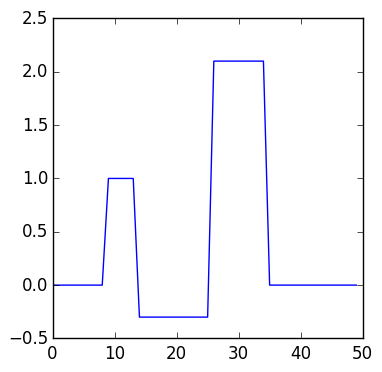

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322537908>

In [6]:
figure(figsize=(4,4))
plot(m)

In [7]:
# Discrete kernel G
N = 20
L = 100
α = 0.8

x = linspace(0, M-1, 50) * L/(M-1)
dx = L/(M-1)
r = linspace(0, N-1, 20) * L/(N-1)

linspace(0.0,100.0,20)

This double loop thing is not idiomatic, I am sure, but we don't care about performance here.

In [8]:
G = zeros(N, M)
for j = 1:M
    for k = 1:N
        G[k,j] = dx * exp(-α * abs(r[k] - x[j])^2)
    end
end

In [10]:
# Compute data
d = G * m

20x1 Array{Float64,2}:
  1.25641e-117
  4.44882e-60 
  8.88893e-22 
  0.0100219   
  1.89932     
  2.0981      
 -0.533863    
 -0.652657    
 -0.552857    
 -0.609585    
  3.65305     
  3.87        
  4.5686      
  3.73396     
  1.65396e-6  
  7.60682e-32 
  1.97411e-76 
  2.89088e-140
  2.38881e-223
  0.0         

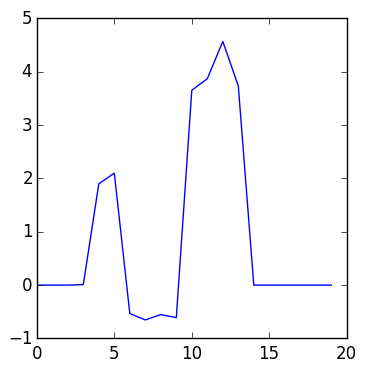

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3191efd68>

In [25]:
figure(figsize=(4,4))
plot(d)

In [11]:
# Minimum norm solution
m_est = G' * inv(G * G') * d

# Data prediction
d_pred = G * m_est

20x1 Array{Float64,2}:
  2.17869e-32
 -1.27328e-28
  9.0518e-22 
  0.0100219  
  1.89932    
  2.0981     
 -0.533863   
 -0.652657   
 -0.552857   
 -0.609585   
  3.65305    
  3.87       
  4.5686     
  3.73396    
  1.65396e-6 
  1.79399e-26
  2.44999e-31
 -4.65814e-35
 -1.17433e-39
  0.0        

In [13]:
# Minimum norm solution
m_est = G' * inv(G * G') * d

50x1 Array{Float64,2}:
 -1.64682e-17
  4.34675e-16
  5.77196e-13
  9.67156e-13
 -6.05615e-10
 -4.85516e-8 
  3.15649e-7 
  0.00121764 
  0.00590152 
  0.00524062 
  1.19486    
  0.350108   
  0.0765616  
  ⋮          
 -2.41464e-10
  5.50822e-10
  2.39898e-12
 -1.42575e-14
 -2.94446e-15
 -7.63294e-19
  1.17406e-19
  1.46448e-21
 -2.33875e-24
 -1.39576e-24
 -1.05112e-27
  3.98228e-29

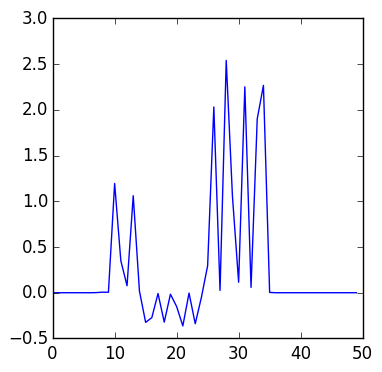

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322694470>

In [15]:
figure(figsize=(4,4))
plot(m_est)

In [11]:
# Data prediction
d_pred = G * m_est

20x1 Array{Float64,2}:
  2.17869e-32
 -1.27328e-28
  9.0518e-22 
  0.0100219  
  1.89932    
  2.0981     
 -0.533863   
 -0.652657   
 -0.552857   
 -0.609585   
  3.65305    
  3.87       
  4.5686     
  3.73396    
  1.65396e-6 
  1.79399e-26
  2.44999e-31
 -4.65814e-35
 -1.17433e-39
  0.0        

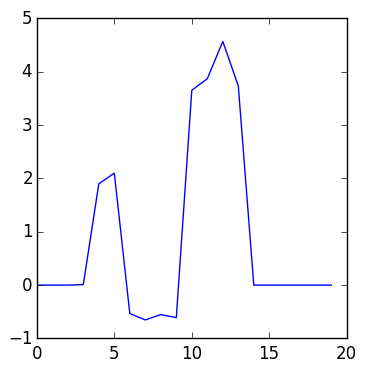

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3225cb6a0>

In [12]:
figure(figsize=(4,4))
plot(d_pred)